__File: src_2021_workshop_fig.ipynb__

__Author:   A. J. Tropiano (tropiano.4@osu.edu)__<br/>
__Date:     Mar 17, 2021__

Generating some figures for Scott's talk in the JLab SRC EMC workshop. Also use this for testing SRC functions and related things.

__Revision history:<br/>__
* Mar 18, 2021 - Created the following plotting functions: n_lambda_deuteron_decomposition, deuteron_3S1_3D1_ratios, factorization_ratios, srg_transformation_ratios_fixed_k, and pp_pn_ratios.

In [1]:
from os import chdir, getcwd
from matplotlib.offsetbox import AnchoredText
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
# Scripts made by A.T.
from Figures import figures_functions as ff
from lda import load_density, LDA
import observables as ob
import operators as op
from Potentials.vsrg_macos import vnn
from SRG.srg_unitary_transformation import SRG_unitary_transformation
# Test scripts
from pmd_deuteron_test import deuteron_pair_momentum_distribution_v1
from test_script import pair_momentum_distributions

In [2]:
# Current working directory
cwd = getcwd()

__Decomposition of $n^{\lambda}_d(q)$__

In [3]:
def n_lambda_deuteron_decomposition(kvnn, lamb, kmax=0, kmid=0, ntot=0, xlim=(0, 4), ylim=(1e-5, 1e3)):
    """
    Plots the SRG-evolved deuteron pair momentum distribution as calculated by our expansion of U(k, k') in
    second quantization. Shows each of the contributions from 1, \delta U, \delta U \delta U^\dagger.
    
    Parameters
    ----------
    kvnn : int
        This number specifies the potential.
    lamb : float
        SRG \lambda parameter [fm^-1].
    kmax : float, optional
        Maximum value in the momentum mesh [fm^-1]. Will use potential's default value if no argument is
        entered.
    kmid : float, optional
        Mid-point value in the momentum mesh [fm^-1]. Will use potential's default value if no argument is
        entered.
    ntot : int, optional
        Number of momentum points in mesh. Will use potential's default value if no argument is entered.
    xlim : tuple, optional
        Limits of x-axis [fm^-1].
    ylim : tuple, optional
        Limits of y-axis [fm^3].
        
    Returns
    -------
    f : Figure
        Figure object from matplotlib subplots function.
    ax : axes.Axes object
        Single Axes object from matplotlib subplots function.
    
    """


    # --- Set up --- #
    
    # Load momentum
    q_array, _ = vnn.load_momentum(kvnn, '3S1', kmax, kmid, ntot)
    
    # Load n_\lambda_d(q) for given potential
    pmd = deuteron_pair_momentum_distribution_v1(kvnn, lamb, kmax, kmid, ntot)

    # Load evolved wave function here (unitless)
    H_initial = vnn.load_hamiltonian(kvnn, '3S1', kmax, kmid, ntot)
    H_evolved = vnn.load_hamiltonian(kvnn, '3S1', kmax, kmid, ntot, method='srg', generator='Wegner', lamb=lamb)
    U_matrix_unitless = SRG_unitary_transformation(H_initial, H_evolved)
    psi_deuteron = ob.wave_function(H_initial, U=U_matrix_unitless) # Unitless
    
    # Now calculate contributions and total
    n_d_1 = np.zeros(ntot) # 1 term
    n_d_deltaU = np.zeros(ntot) # \delta U terms
    n_d_deltaU_squared = np.zeros(ntot) # \delta U \delta U^\dagger term
    for iq, q in enumerate(q_array):
        first_term, second_third_term, fourth_term = pmd.n_deuteron(q, psi_deuteron)
        n_d_1[iq] = first_term
        n_d_deltaU[iq] = second_third_term
        n_d_deltaU_squared[iq] = fourth_term
    n_d_total_array = n_d_1 + n_d_deltaU + n_d_deltaU_squared
    
    
    # --- Plot --- #
    
    # Figure size
    row_number = 1
    col_number = 1
    figure_size = (4*col_number, 4*row_number)
        
    # Axes labels and fontsize
    x_label = 'q [fm' + r'$^{-1}$' + ']'
    x_label_size = 18
    y_label = r'$n^{\lambda}_d(q)$' + ' [fm' + r'$^3$' + ']'
    y_label_size = 20
    axes_tick_size = 14
    
    # Curve width
    curve_width = 2.0

    # Subplot labels
    legend_size = 17
    legend_location = 'upper right'

    # Initialize figure
    plt.close('all')
    f, ax = plt.subplots(figsize=figure_size)
    
    # Plot total
    ax.semilogy(q_array, n_d_total_array, color='xkcd:black', label='Total', linestyle='solid',
                linewidth=curve_width)
    # Plot 1 term
    ax.semilogy(q_array, n_d_1, color='xkcd:blue', label='1', linestyle='dotted', linewidth=curve_width)
    # Plot \delta U term (take absolute value!)
    ax.semilogy(q_array, abs(n_d_deltaU), color='xkcd:green', label=r'$\delta$' + 'U', linestyle='dashed',
                linewidth=curve_width)
    # Plot \delta U term
    ax.semilogy(q_array, n_d_deltaU_squared, color='xkcd:red',
                label=r'$\delta$' + 'U' + r'$\delta$' + 'U' + r'$^{\dagger}$', linestyle='dashdot',
                linewidth=curve_width)
    
    # Specify axes limits
    ax.set_xlim(xlim)
    ax.set_ylim(ylim)
    
    # Set axes labels, legend, and anchored text labels
    ax.set_xlabel(x_label, fontsize=x_label_size)
    ax.set_ylabel(y_label, fontsize=y_label_size)
    ax.legend(loc=legend_location, frameon=False, fontsize=legend_size)
    
    # Enlarge axes tick marks
    ax.tick_params(labelsize=axes_tick_size)
    
    return f, ax

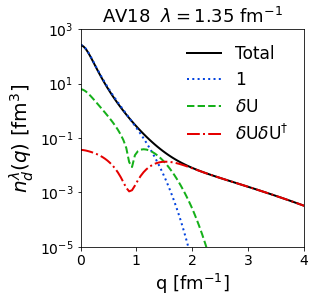

In [4]:
# Plot for AV18 at \lambda = 1.35

kvnn = 6
lamb = 1.35
kmax, kmid, ntot = 10.0, 2.0, 120 # Default mesh

f, ax = n_lambda_deuteron_decomposition(kvnn, lamb, kmax, kmid, ntot)

# # Add kvnn, \lambda label to plot
# label = 'AV18\n' + r'$\lambda=%.2f$' % lamb + ' fm' + r'$^{-1}$'
# label_location = 'lower right'
# label_size = 17
# anchored_text = AnchoredText(label, loc=label_location, prop=dict(size=label_size), frameon=False)
# ax.add_artist(anchored_text)

# Add kvnn, \lambda label to plot as title
label = 'AV18  ' + r'$\lambda=%.2f$' % lamb + ' fm' + r'$^{-1}$'
label_size = 18
ax.set_title(label, fontsize=label_size)

# Set file name
file_name = 'n_lambda_deuteron_decomposition_kvnn_%d_lamb_%.2f.pdf' % (kvnn, lamb)
file_name = ff.replace_periods(file_name) + '.pdf'

# Save figure as .pdf
chdir('Figures/SRC_physics/SRC_2021_workshop_figures')
f.savefig(file_name, bbox_inches='tight')
chdir(cwd)

__Deuteron $^{3}S_1$ / ($^{3}S_1-^{3}D_1$) ratio for high-$q$ term__

In [5]:
def deuteron_3S1_3D1_ratios(kvnns, lamb, xlim=(0, 4), ylim=(0, 1)):
    """
    Plots the 3S1 / 3S1-3D1 ratio of the \delta U \delta U^\dagger SRG-evolved deuteron pair momentum
    distribution term .
    
    Parameters
    ----------
    kvnns : tuple
        Numbers which specify the potentials where each number is an integer (e.g. (79, 111, 222)).
    lamb : float
        SRG \lambda parameter [fm^-1].
    kmax : float, optional
        Maximum value in the momentum mesh [fm^-1]. Will use potential's default value if no argument is
        entered.
    kmid : float, optional
        Mid-point value in the momentum mesh [fm^-1]. Will use potential's default value if no argument is
        entered.
    ntot : int, optional
        Number of momentum points in mesh. Will use potential's default value if no argument is entered.
    xlim : tuple, optional
        Limits of x-axis [fm^-1].
    ylim : tuple, optional
        Limits of y-axis [unitless].
        
    Returns
    -------
    f : Figure
        Figure object from matplotlib subplots function.
    ax : axes.Axes object
        Single Axes object from matplotlib subplots function.
    
    """
    
    
    # --- Set up --- #
    
    # Initialize dictionary to store evolved potentials and momentum arrays
    d = {}
    
    # Loop over kvnns
    for kvnn in kvnns:
    
        d[kvnn] = {} 
    
        # Load momentum
        q_array, _ = vnn.load_momentum(kvnn, '3S1')
        d[kvnn]['q_array'] = q_array
    
        # Load n_\lambda_d(q) for given potential
        pmd = deuteron_pair_momentum_distribution_v1(kvnn, lamb)

        # Load evolved wave function here (unitless)
        H_initial = vnn.load_hamiltonian(kvnn, '3S1')
        H_evolved = vnn.load_hamiltonian(kvnn, '3S1', method='srg', generator='Wegner', lamb=lamb)
        U_matrix_unitless = SRG_unitary_transformation(H_initial, H_evolved)
        psi_deuteron = ob.wave_function(H_initial, U=U_matrix_unitless) # Unitless
    
        # Now calculate ratio
        ratio_array = np.zeros(ntot)
        for iq, q in enumerate(q_array):
            ratio_array[iq] = pmd.n_deuteron_fourth_term_ratio(q, psi_deuteron)
        
        # Store in dictionary
        d[kvnn]['ratio'] = ratio_array
    
    
    # --- Plot --- #
    
    # Figure size
    row_number = 1
    col_number = 1
    figure_size = (4*col_number, 4*row_number)
        
    # Axes labels and fontsize
    x_label = 'q [fm' + r'$^{-1}$' + ']'
    x_label_size = 18
    # y_label = r'$n^{\lambda}_d(q)$' + ' ratio'
    y_label = r'$\delta U \delta U^{\dagger}$' + ' ratio'
    y_label_size = 20
    axes_tick_size = 14
    
    # Curve width
    curve_width = 2.0

    # Subplot labels
    legend_size = 16
    legend_location = 'lower right'

    # Initialize figure
    plt.close('all')
    f, ax = plt.subplots(figsize=figure_size)
    
    # Add horizontal line at ratio = 1
    ax.axhline(1.0, color='xkcd:black', linestyle='dotted')
    
    # Loop over kvnns
    for i, kvnn in enumerate(kvnns):
        
        curve_color = ff.xkcd_colors(i)
        # curve_style = ff.line_styles(i)
        curve_label = ff.kvnn_label_conversion(kvnn)
        
        ax.plot(d[kvnn]['q_array'], d[kvnn]['ratio'], color=curve_color, linestyle='solid',
                label=curve_label, linewidth=curve_width)
        
    # Specify axes limits
    ax.set_xlim(xlim)
    ax.set_ylim(ylim)
    
    # Set axes labels, legend, and anchored text labels
    ax.set_xlabel(x_label, fontsize=x_label_size)
    ax.set_ylabel(y_label, fontsize=y_label_size)
    ax.legend(loc=legend_location, frameon=False, fontsize=legend_size)
    
    # Enlarge axes tick marks
    ax.tick_params(labelsize=axes_tick_size)
    
    return f, ax

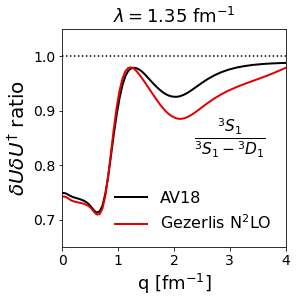

In [6]:
# Plot for AV18 and Gezerlis N2LO 1 fm at \lambda = 1.35

kvnns = (6, 222)
lamb = 1.35
kmax, kmid, ntot = 10.0, 2.0, 120 # Default mesh
ylim = (0.65, 1.05)

f, ax = deuteron_3S1_3D1_ratios(kvnns, lamb, ylim=ylim)

# Add \lambda label to plot as title
lambda_label = r'$\lambda=%.2f$' % lamb + ' fm' + r'$^{-1}$'
lambda_label_size = 18
ax.set_title(lambda_label, fontsize=lambda_label_size)

# Add 3S1 only / 3S1-3D1 label
ratio_label = r'$\frac{^{3}S_1}{^{3}S_1-^{3}D_1}$'
ratio_label_location = 'center right'
ratio_label_size = 22
anchored_text = AnchoredText(ratio_label, loc=ratio_label_location, prop=dict(size=ratio_label_size),
                             frameon=False)
ax.add_artist(anchored_text)

# Set file name
file_name = 'deuteron_3S1_3D1_ratios_lamb_%.2f_kvnns' % lamb
for kvnn in kvnns:
    file_name += '_%d' % kvnn
file_name = ff.replace_periods(file_name) + '.pdf'

# Save figure as .pdf
chdir('Figures/SRC_physics/SRC_2021_workshop_figures')
f.savefig(file_name, bbox_inches='tight')
chdir(cwd)

__$^{3}S_1$ and $^{3}D_1$ contributions to $n^{\lambda}_d(q)$ (bar chart)__

In [7]:
# copy figure from old src notebook

__Factorization of $\delta U \delta U^{\dagger}$__

In [8]:
def factorization_ratios(k_0, k_points, kvnn, channel, lamb, xlim=(0.0, 5.0), ylim=(1e-1, 1e1)):
    """
    Plots the ratio of \delta U \delta U^{\dagger} with respect to momentum [fm^-1] for k = k_points in the 
    numerator and k = k_0 in the denominator, and k' = q_array.
    
    Parameters
    ----------
    k_0 : float
        Momentum value for U(k_0, q) in the denominator [fm^-1].
    k_points : 1-D ndarray
        Array of momentum values for U(k_points, q) in the numerator [fm^-1].
    kvnn : int
        This number specifies the potential.
    channel : str
        The partial wave channel (e.g. '1S0').
    lamb : float
        Evolution parameter lambda [fm^-1].
    xlim : tuple, optional
        Limits of x-axis [fm^-1].
    ylim : tuple, optional
        Limits of y-axis [unitless].

    Returns
    -------
    f : Figure
        Figure object from matplotlib subplots function.
    ax : axes.Axes object
        Single Axes object from matplotlib subplots function.
    
    """
     
    # --- Set-up --- #
    
    # Initialize dictionary to store ratio at each k_i point
    d = {}

    # Load momentum and weights
    q_array, q_weights = vnn.load_momentum(kvnn, channel)

    # Number of points in momentum array
    ntot = len(q_array)
    # Use factor_array to divide out momenta/weights for mesh-independent result
    if vnn.coupled_channel(channel):
        factor_array = np.concatenate( (np.sqrt(q_weights) * q_array, np.sqrt(q_weights) * q_array) ) * \
                       np.sqrt(2/np.pi)
    else:
        factor_array = np.sqrt(2*q_weights/np.pi) * q_array
    row, col = np.meshgrid(factor_array, factor_array)
    
    # Load initial and evolved Hamiltonians
    H_initial = vnn.load_hamiltonian(kvnn, channel)
    H_evolved = vnn.load_hamiltonian(kvnn, channel, method='srg', lamb=lamb)
    
    # Calculate SRG transformation
    U_matrix_unitless = SRG_unitary_transformation(H_initial, H_evolved)
    
    # Converting to units [fm^3]
    I_matrix_unitless = np.eye( len(factor_array), len(factor_array) )
    delta_U_matrix_unitless = U_matrix_unitless - I_matrix_unitless
    delta_U_matrix = delta_U_matrix_unitless / row / col
    
    # Obtain \delta U(k_0, q) \delta U^{\dagger}(q, k_0) array
    k_0_index = op.find_q_index(k_0, q_array)
    delU_squared_denominator = delta_U_matrix[k_0_index, :ntot] * delta_U_matrix.T[:ntot, k_0_index]
    
    # Loop over k_i in k_points
    for k_i in k_points:
        
        # Index of k_i in q_array
        k_i_index = op.find_q_index(k_i, q_array)
            
        # Obtain U(k_i, q) array
        delU_squared_numerator = delta_U_matrix[k_i_index, :ntot] * delta_U_matrix.T[:ntot, k_i_index]
        
        # Calculate ratio and store in dictionary with k_i as the key
        d[k_i] = abs(delU_squared_numerator / delU_squared_denominator)
            

    # --- Plot --- #
    
    # Size of figure
    row_number = 1
    col_number = 1
    figure_size = (4*col_number, 4*row_number)
    
    # Axes ticks, labels, and fontsizes
    x_label = 'q [fm' + r'$^{-1}$' + ']'
    x_label_size = 18
    x_stepsize = 1.0
    x_ticks = np.arange(0.0, xlim[1] + x_stepsize, x_stepsize)
    x_ticks_strings = ff.convert_ticks_to_labels(x_ticks)
    y_label = r'$\delta U \delta U^{\dagger}(k, q)$' + ' ratio'
    y_label_size = 18
    axes_tick_size = 14
    
    # Curve width
    curve_width = 2.0
    
    # Subplot labels
    legend_size = 15
    legend_location = 'upper left'
    
    # Initialize figure
    plt.close('all')
    f, ax = plt.subplots(row_number, col_number, figsize=figure_size)
    
    # Loop over kvnns keeping track of indices
    for i, k_i in enumerate(k_points):
            
        # Curve color, styles, and labels
        curve_color = ff.xkcd_colors(i)
        curve_style = ff.line_styles(i)
        curve_label = r'$k_{%d}=%.1f$' % (i+1, k_i) + ' fm' + r'$^{-1}$'
            
        # Add curve to figure
        ax.semilogy(q_array, d[k_i], color=curve_color, label=curve_label, linestyle=curve_style,
                    linewidth=curve_width)
            
    # Shade gray from 0 to \lambda or \Lambda_BD value on plot
    ax.fill_betweenx(ylim, 0, lamb, edgecolor='xkcd:grey', facecolor='xkcd:grey', alpha=0.2)
            
    # Specify axes limits
    ax.set_xlim(xlim)
    ax.set_ylim(ylim)

    # Set axes labels, legend, and anchored text labels
    ax.set_xlabel(x_label, fontsize=x_label_size)
    ax.set_ylabel(y_label, fontsize=y_label_size)
    ax.legend(bbox_to_anchor=(1.05, 1), loc=legend_location, borderaxespad=0, frameon=False,
              fontsize=legend_size)
                     
    return f, ax

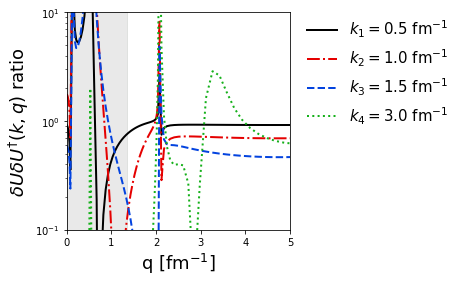

In [9]:
# Factorization ratios for AV18 at \lambda=1.35 fm^-1

k_0 = 0.1
k_points = (0.5, 1.0, 1.5, 3.0)
kvnn = 6
channel = '3S1'
lamb = 1.35
f, ax = factorization_ratios(k_0, k_points, kvnn, channel, lamb)

# Set file name
file_name = 'factorization_ratios_kvnn_%d_%s_k0_%.1f_kpoints' % (kvnn, channel, k_0)
for k_i in k_points:
    file_name += '_%.1f' % k_i
file_name = ff.replace_periods(file_name) + '.pdf'

# Save figure as .pdf
chdir('Figures/SRC_physics/SRC_2021_workshop_figures')
f.savefig(file_name, bbox_inches='tight')
chdir(cwd)

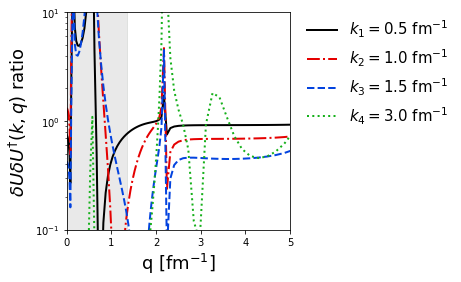

In [10]:
# Factorization ratios for Gezerlis N2LO 1 fm at \lambda=1.35 fm^-1

k_0 = 0.1
k_points = (0.5, 1.0, 1.5, 3.0)
kvnn = 222
channel = '3S1'
lamb = 1.35
f, ax = factorization_ratios(k_0, k_points, kvnn, channel, lamb)

# Set file name
file_name = 'factorization_ratios_kvnn_%d_%s_k0_%.1f_kpoints' % (kvnn, channel, k_0)
for k_i in k_points:
    file_name += '_%.1f' % k_i
file_name = ff.replace_periods(file_name) + '.pdf'

# Save figure as .pdf
chdir('Figures/SRC_physics/SRC_2021_workshop_figures')
f.savefig(file_name, bbox_inches='tight')
chdir(cwd)

__Ratio of ($^{3}S_1-^{3}D_1$) / $^{1}S_0$ SRG transformations__

In [11]:
def srg_transformation_ratios_fixed_k(k_0, kvnns, lamb, xlim=(0.0, 800.0), ylim=(1e0, 1e3)):
    """
    Plots ratios of U(k_0, q)_{3S1-3D1} / U(k_0, q)_{1S0} with respect to momentum k [fm^-1] where k_0 < \lambda.
    
    Parameters
    ----------
    k_0 : float
        k_0 value in the ratio U(k_0, q)_{3S1} / U(k_0, q)_{1S0} [fm^-1].
    kvnns : tuple
        Numbers which specify the potentials where each number is an integer (e.g. (6, 222)).
    lamb : float
        Evolution parameter lambda [fm^-1].
    xlim : tuple, optional
        Limits of x-axis [fm^-1].
    ylim : tuple, optional
        Limits of y-axis (which is log scale and unitless).
        
    Returns
    -------
    f : Figure
        Figure object from matplotlib subplots function.
    ax : axes.Axes object
        Single Axes object from matplotlib subplots function.
    
    """

    # --- Set up --- #
    
    # Store results in dictionary where kvnns are the keys
    d = {}
    
    for kvnn in kvnns:
    
        # Load momentum and weights (channel argument doesn't matter here)
        k_array, k_weights = vnn.load_momentum(kvnn, '1S0')
    
        # Length of the momentum array
        ntot = len(k_array)
    
        # Divide out integration factors with factor_array
        factor_array = np.sqrt( (2*k_weights) / np.pi ) * k_array
        row, col = np.meshgrid(factor_array, factor_array)
        # Same thing but for coupled-channel
        factor_array_cc = np.concatenate( (factor_array, factor_array) )
        row_cc, col_cc = np.meshgrid(factor_array_cc, factor_array_cc)
    
        # Load initial and evolved Hamiltonians [MeV], and SRG transformations
        # 1S0
        H_initial_1s0 = vnn.load_hamiltonian(kvnn, '1S0')
        H_evolved_1s0 = vnn.load_hamiltonian(kvnn, '1S0', method='srg', lamb=lamb)
        # 3S1
        H_initial_3s1 = vnn.load_hamiltonian(kvnn, '3S1')
        H_evolved_3s1 = vnn.load_hamiltonian(kvnn, '3S1', method='srg', lamb=lamb)
    
        # Calculate SRG transformation with eigenvectors of initial and evolved Hamiltonians dividing out 
        # integration factors
        U_matrix_1s0 = SRG_unitary_transformation(H_initial_1s0, H_evolved_1s0) / row / col
        U_matrix_3s1 = SRG_unitary_transformation(H_initial_3s1, H_evolved_3s1) / row_cc / col_cc
    
        # Index of k_0 in k_array
        k_0_index = op.find_q_index(k_0, k_array)
        
        # Calculate |U(k_0, q)_{3S1}|^2
        numerator_array = U_matrix_3s1[k_0_index, :ntot] * U_matrix_3s1.T[:ntot, k_0_index] + \
                          U_matrix_3s1[k_0_index, ntot:] * U_matrix_3s1.T[ntot:, k_0_index]
        
        # Calculate |U(k, q_i)_{1S0}|^2
        denominator_array = U_matrix_1s0[k_0_index, :ntot] * U_matrix_1s0.T[:ntot, k_0_index]
        
        # Store ratio in dictionary
        d[kvnn] = numerator_array / denominator_array
        
        
    # --- Plot ratios --- #
    
    # Convert x-axis to MeV
    hbar_c = 197.326 # MeV*fm
    e_array = k_array * hbar_c

    # Figure size
    row_number = 1
    col_number = 1
    figure_size = (4*col_number, 4*row_number)

    # Axes labels and fontsize
    x_label = 'q [MeV]'
    x_label_size = 18
    # y_label = r'$n_{\lambda}(q)$' + ' ratio'
    y_label = r'$U_{\lambda}(k_0, q)$' + ' ratio'
    y_label_size = 20
    axes_tick_size = 14
    
    # Legend label
    legend_size = 15
    legend_location = 'lower left'

    # Curve width
    curve_width = 2.0

    # Initialize figure
    plt.close('all')
    f, ax = plt.subplots(figsize=figure_size)

    # Loop over kvnns keeping track of index
    for i, kvnn in enumerate(kvnns):
        
        # Curve color and label
        curve_color = ff.xkcd_colors(i)
        curve_label = ff.kvnn_label_conversion(kvnn)
        
        # Add curve to figure
        ax.semilogy(e_array, d[kvnn], color=curve_color, label=curve_label, linestyle='solid',
                    linewidth=curve_width)
        
    # Shade gray from 0 to \lambda or \Lambda_BD value on plot
    ax.fill_betweenx(ylim, 0.0, lamb * hbar_c, edgecolor='xkcd:grey', facecolor='xkcd:grey', alpha=0.2)

    # Specify axes limits
    ax.set_xlim(xlim)
    ax.set_ylim(ylim)
        
    # Set axes labels and legend
    ax.set_xlabel(x_label, fontsize=x_label_size)
    ax.set_ylabel(y_label, fontsize=y_label_size)
    #ax.legend(bbox_to_anchor=(1.05, 1), loc=legend_location, borderaxespad=0., fontsize=legend_size)
    ax.legend(loc=legend_location, fontsize=13)

    # Enlarge axes tick marks
    ax.tick_params(labelsize=axes_tick_size)
    
    return f, ax

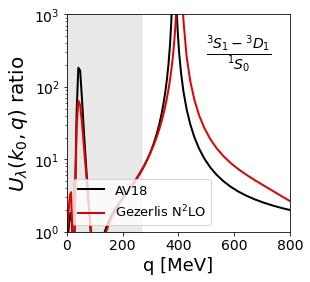

In [12]:
# Ratio of U_3S1 / U_1S0 as a function of q for AV18 and Gezerlis N2LO 1 fm at \lambda = 1.35 fm^-1

k_0 = 0.1
kvnns = (6, 222)
lamb = 1.35
f, ax = srg_transformation_ratios_fixed_k(k_0, kvnns, lamb)

# Add 3S1-3D1 / 1S0 label
ratio_label = r'$\frac{^{3}S_1-^{3}D_1}{^{1}S_0}$'
ratio_label_location = 'upper right'
ratio_label_size = 20
anchored_text = AnchoredText(ratio_label, loc=ratio_label_location, prop=dict(size=ratio_label_size),
                             frameon=False)
ax.add_artist(anchored_text)

# Save figure
file_name = 'srg_transformation_ratios_k0_%.1f_lamb_%.2f_kvnns' % (k_0, lamb)
for kvnn in kvnns:
    file_name += '_%d' % kvnn
file_name = ff.replace_periods(file_name)
chdir('Figures/SRC_physics/SRC_2021_workshop_figures')
f.savefig(file_name + '.pdf', bbox_inches='tight')
chdir(cwd)

__High-$q$ pp/pn ratios of $n_{\lambda}^A(q,Q=0)$__

In [13]:
def pp_pn_ratios(nuclei_list, kvnn, lamb, kmax=0.0, kmid=0.0, ntot=0, xlim=(0, 800), ylim=(0, 1)):
    """
    Plots the ratio of pp/pn pairs in nuclei under LDA.
    
    Parameters
    ----------
    nuclei_list : list
        List that contains the details for various nuclei formatted as another list:
        [name (str), Z (int), N (int)] (e.g., nuclei_list[i] = ['O16', 8, 8]).
    kvnn : int
        This number specifies the potential.
    lamb : float
        SRG \lambda parameter [fm^-1].
    kmax : float, optional
        Maximum value in the momentum mesh [fm^-1]. Will use potential's default value if no argument is
        entered.
    kmid : float, optional
        Mid-point value in the momentum mesh [fm^-1]. Will use potential's default value if no argument is
        entered.
    ntot : int, optional
        Number of momentum points in mesh. Will use potential's default value if no argument is entered.
    xlim : tuple, optional
        Limits of x-axis [MeV].
    ylim : tuple, optional
        Limits of y-axis [unitless].
        
    Returns
    -------
    f : Figure
        Figure object from matplotlib subplots function.
    ax : axes.Axes object
        Single Axes object from matplotlib subplots function.
    
    """
    
    
    # --- Set up --- #
    
    # Load momentum
    q_array, _ = vnn.load_momentum(kvnn, '1S0', kmax, kmid, ntot)
    
    # Initialize pair momentum distributions class
    pmd = pair_momentum_distributions(kvnn, lamb, kmax, kmid, ntot)
    
    # Initialize dictionary
    d = {}
    
    # Loop over nuclei
    for nucleus in nuclei_list:
        
        name = nucleus[0]
        Z = nucleus[1]
        N = nucleus[2]
        A = N + Z
        r_array, rho_p_array = load_density(name, 'proton', Z, N)
        r_array, rho_n_array = load_density(name, 'neutron', Z, N)
        
        # Call LDA class
        lda = LDA(r_array, rho_p_array, rho_n_array)
    
        # Calculate momentum distributions
        n_pp_array = lda.local_density_approximation( q_array, pmd.n_lambda_pp, 'pp' )
        n_pn_array = lda.local_density_approximation( q_array, pmd.n_lambda_pn, 'pn' )
        
        # Store pp/pn ratio in dictionary for each nucleus
        d[name] = n_pp_array / n_pn_array
    
    
    # --- Plot --- #
    
    # Convert x-axis to MeV
    hbar_c = 197.326 # MeV*fm
    e_array = q_array * hbar_c
    
    # Figure size
    row_number = 1
    col_number = 1
    figure_size = (4*col_number, 4*row_number)
        
    # Axes labels and fontsize
    x_label = 'q [MeV]'
    x_label_size = 18
    y_label = r'$n^{\lambda}_A(q,Q=0)$' + ' ratio'
    y_label_size = 20
    axes_tick_size = 14
    
    # Curve width
    curve_width = 2.0

    # Subplot labels
    legend_size = 15
    legend_location = 'upper left'

    # Initialize figure
    plt.close('all')
    f, ax = plt.subplots(figsize=figure_size)

    # Loop over nuclei
    for i, nucleus in enumerate(nuclei_list):
        
        curve_color = ff.xkcd_colors(i)
        curve_style = ff.line_styles(i)
        A = nucleus[1] + nucleus[2]
        if A < 20:
            name = nucleus[0][0]
        else:
            name = nucleus[0][0:2]
        curve_label = r'$^{%d}$' % A + name
        
        ax.plot(e_array, d[ nucleus[0] ], color=curve_color, linestyle=curve_style, label=curve_label,
                linewidth=curve_width)
        
    # Specify axes limits
    ax.set_xlim(xlim)
    ax.set_ylim(ylim)
    
    # Set axes labels, legend, and anchored text labels
    ax.set_xlabel(x_label, fontsize=x_label_size)
    ax.set_ylabel(y_label, fontsize=y_label_size)
    ax.legend(loc=legend_location, frameon=False, fontsize=legend_size)
    
    # Enlarge axes tick marks
    ax.tick_params(labelsize=axes_tick_size)
    
    return f, ax

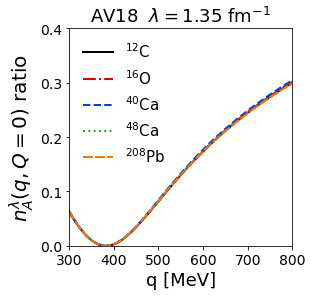

In [14]:
# Plot for AV18 at \lambda = 1.35

nuclei_list = [ ['C12', 6, 6], ['O16', 8, 8], ['Ca40', 20, 20], ['Ca48', 20, 28], ['Pb208', 82, 126] ]
kvnn = 6
lamb = 1.35
kmax, kmid, ntot = 10.0, 2.0, 120 # Default mesh
xlim = (300, 800) # Currently we have the wrong low-momentum part. Just show high-q tail.
ylim = (0.0, 0.4)

f, ax = pp_pn_ratios(nuclei_list, kvnn, lamb, kmax, kmid, ntot, xlim, ylim)

# Add kvnn, \lambda label to plot as title
label = 'AV18  ' + r'$\lambda=%.2f$' % lamb + ' fm' + r'$^{-1}$'
label_size = 18
ax.set_title(label, fontsize=label_size)

# Set file name
file_name = 'pp_pn_ratios_kvnn_%d_lamb_%.2f.pdf' % (kvnn, lamb)
file_name = ff.replace_periods(file_name) + '.pdf'

# Save figure as .pdf
chdir('Figures/SRC_physics/SRC_2021_workshop_figures')
f.savefig(file_name, bbox_inches='tight')
chdir(cwd)

__$a_2$ scaling factors with respect to $A$__

In [15]:
# a_2 scaling factor calculations

# \int_2^{\infty} dq P^A(q) / \int_2^{\infty} dq P^d(q) vs A
# print values as well